<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# set the doc file path
Sat_path = 'sat_scores.csv'

In [3]:
# Generate a dictionary from the csv file
Sat_dict = {'State':[], 'Rate':[], 'Verbal':[], 'Math':[]}
with open(Sat_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        for key, value in row.items():
            Sat_dict[key].append(value)


In [4]:
# get dictionary 
Sat_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# convert from dictionary to dataframe
sat_from_dict = pd.DataFrame.from_dict(Sat_dict)

In [6]:
sat_from_dict.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [7]:
sat_from_dict.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [8]:
# read the data to dataframe
sat_data = pd.read_csv(Sat_path)

In [9]:
sat_data.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [10]:
sat_data.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [11]:
# data types of pandas convert result
sat_data.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [12]:
# data types of csv dictionary convert result
sat_from_dict.dtypes
# data are in string

State     object
Rate      object
Verbal    object
Math      object
dtype: object

## Answer:
The dataframe converted from loading csv to dictionary gives all data as string.
The dataframe read by Pandas convert int to int.

after converting, all numbers are identical

In [13]:
# convert the rate, verbal, math col as int
sat_from_dict[['Rate', 'Verbal','Math']] = sat_from_dict[['Rate', 'Verbal','Math']].astype(int)

In [14]:
(sat_data==sat_from_dict).head()

,State,Rate,Verbal,Math
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [15]:
# get first 10 row for the data
sat_data.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [16]:
# get last 10 row of data
sat_data.tail(10)

,State,Rate,Verbal,Math
42,MO,8,577,577
43,LA,7,564,562
44,WI,6,584,596
45,AR,6,562,550
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


## Answer
This data sat is about the SAT exam in USA. Stats for different states.Notice the last entry is for the full country. Remove it from the data. taking the stats on the score as average of the states
### cookbook
'State'  -> the short name of each state
'Rate'   -> the Participation rate of the students
'Verbal' -> average reading test score 
'Math'   -> Average math test score

In [17]:
# remove all stats from states
sat_data.iloc[51,:]

State     All
Rate       45
Verbal    506
Math      514
Name: 51, dtype: object

In [18]:
# Keep a copy of original data, drop the all stats
sat_data_origin = sat_data.copy()
sat_data.drop(index=51, axis=1, inplace=True)

In [19]:
sat_data.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [20]:
sat_data.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [21]:
# create data dictionary for the data
sat_data_dict = {}

sat_data_dict['dtypes'] = sat_data.dtypes.to_dict()
sat_data_dict['shape'] = sat_data.shape
sat_data_dict['columns'] = list(sat_data.columns)
sat_data_dict['description'] = {'State': 'The short name of each state', 'Rate': 'The Participation rate of the students', 
                                'Verbal': 'Average reading test score', 'Math': 'Average math test score'}

In [22]:
sat_data_dict

{'dtypes': {'State': dtype('O'),
  'Rate': dtype('int64'),
  'Verbal': dtype('int64'),
  'Math': dtype('int64')},
 'shape': (51, 4),
 'columns': ['State', 'Rate', 'Verbal', 'Math'],
 'description': {'State': 'The short name of each state',
  'Rate': 'The Participation rate of the students',
  'Verbal': 'Average reading test score',
  'Math': 'Average math test score'}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

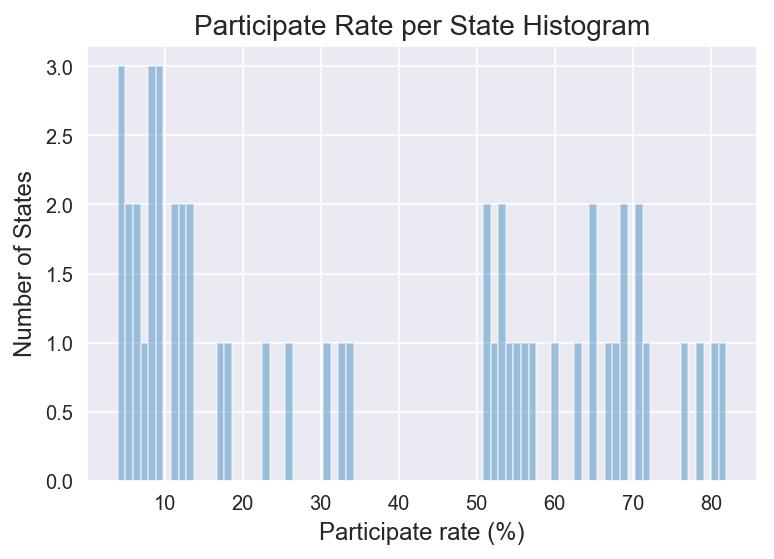

In [23]:
sns.distplot(sat_data.Rate, kde=False, bins=80)
plt.title('Participate Rate per State Histogram', fontsize=14)
plt.ylabel('Number of States', fontsize=12)
plt.xlabel('Participate rate (%)', fontsize=12);


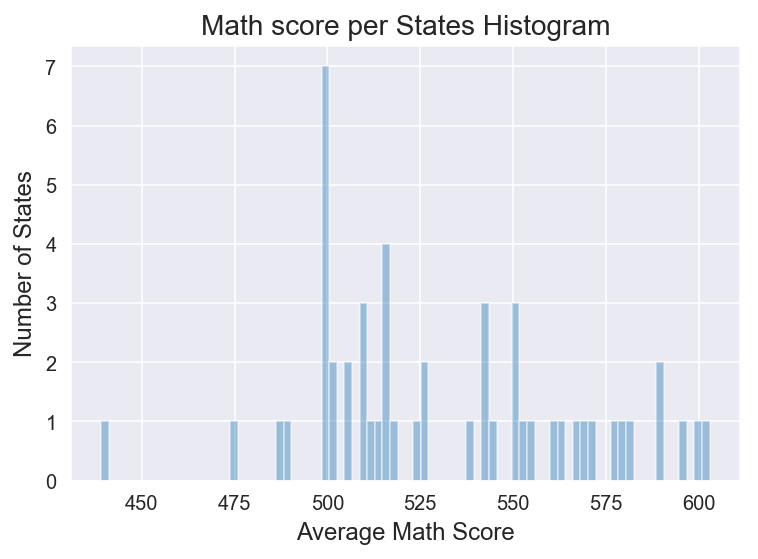

In [24]:
sns.distplot(sat_data.Math, kde=False, bins=80)
plt.title('Math score per States Histogram', fontsize=14)
plt.ylabel('Number of States', fontsize=12)
plt.xlabel('Average Math Score', fontsize=12);

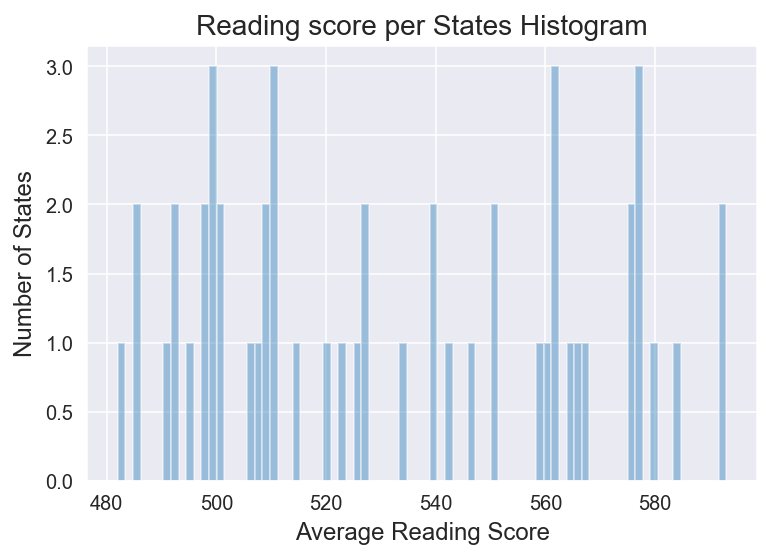

In [25]:
sns.distplot(sat_data.Verbal, kde=False, bins=80)
plt.title('Reading score per States Histogram', fontsize=14)
plt.ylabel('Number of States', fontsize=12)
plt.xlabel('Average Reading Score', fontsize=12);

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

C:\Users\huwenmiao\Anaconda3\envs\gadsi36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


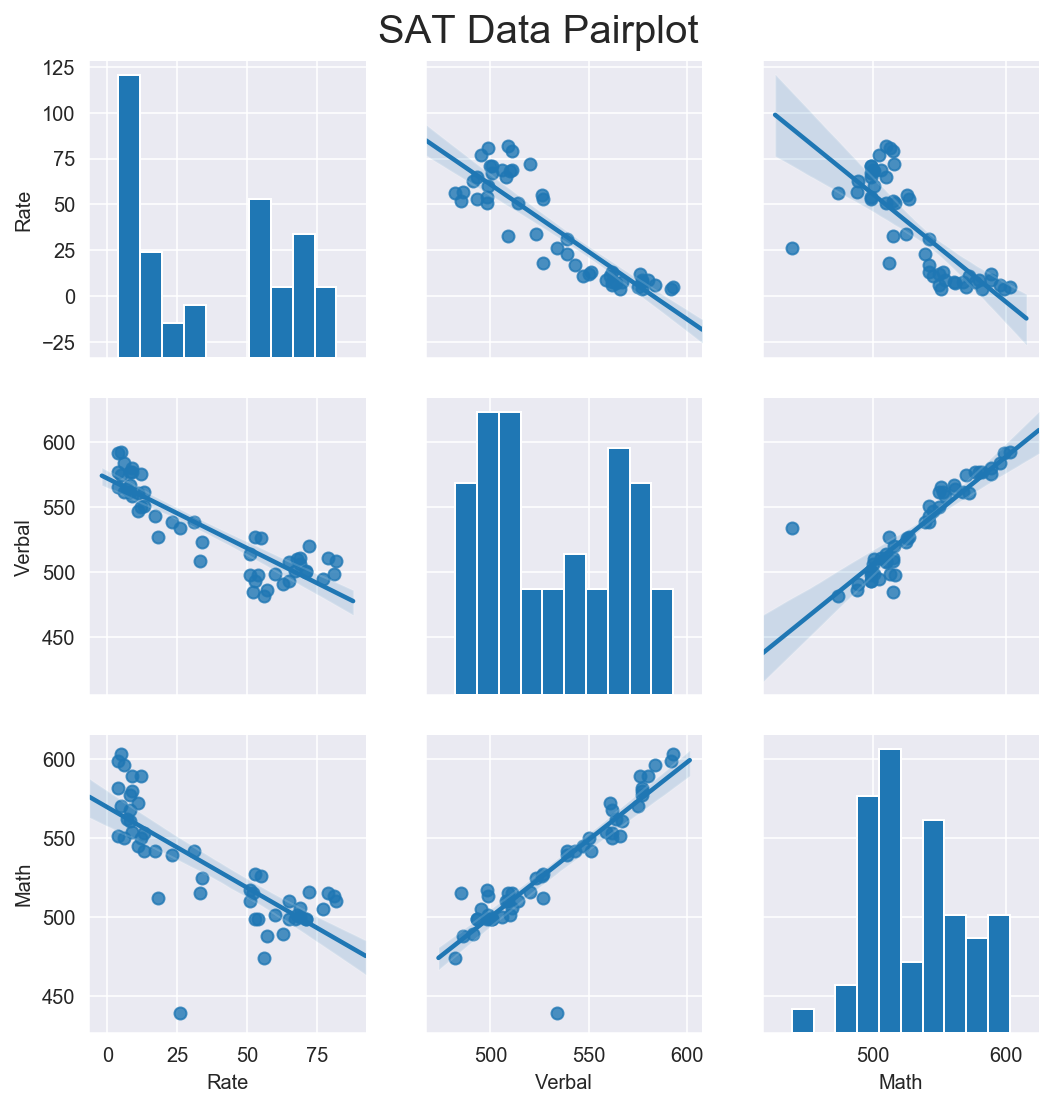

In [26]:
ax = sns.pairplot(sat_data, kind="reg")
ax.fig.text(0.35, 1,'SAT Data Pairplot', va='center', fontsize=20);

## Answer:

### point 1: the higher the participant rate the lower the average score, for both Math and reading test (negative correlated)
### point 2: the average math score and reading score is positive correlated

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [27]:
# adding new column total score
sat_data['Sum_Score'] = sat_data.Math + sat_data.Verbal

In [28]:
sat_data.head()

,State,Rate,Verbal,Math,Sum_Score
0,CT,82,509,510,1019
1,NJ,81,499,513,1012
2,MA,79,511,515,1026
3,NY,77,495,505,1000
4,NH,72,520,516,1036


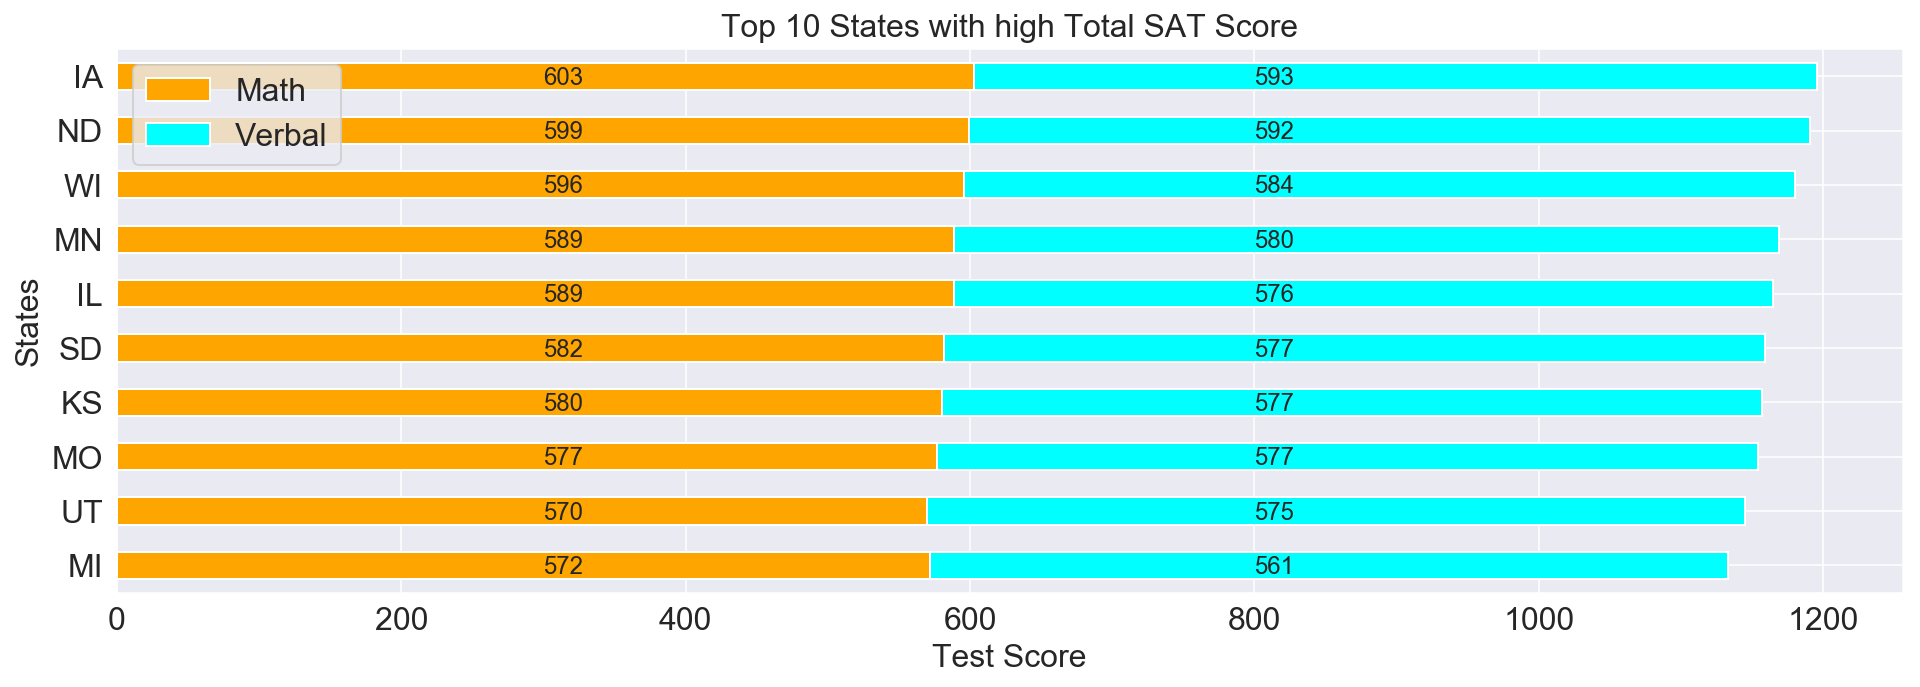

In [29]:
# sort by total score get the top 10 states
Top10 = sat_data.sort_values(by='Sum_Score', ascending=False).head(10)
ax = Top10[['Math', 'Verbal']].plot(kind='barh', stacked=True,figsize=(16,5), color=['orange','cyan'])

ax.set_yticklabels(list(Top10.State.values),fontsize=16)
ax.set_xticklabels(list(range(0,1201,200)), fontsize=16)
ax.invert_yaxis()
plt.legend(loc=2, prop={'size': 16})
plt.xlabel('Test Score', fontsize=16)
plt.ylabel('States', fontsize=16)
plt.title('Top 10 States with high Total SAT Score', fontsize=16, )

for i, p in enumerate(ax.patches):
    if i<10:
        ax.annotate(str(p.get_width()), ( 300, p.get_y() + 0.4), fontsize=12)
    else:
        ax.annotate(str(p.get_width()), ( 800, p.get_y() + 0.4), fontsize=12)


In [30]:
Top10

,State,Rate,Verbal,Math,Sum_Score
47,IA,5,593,603,1196
49,ND,4,592,599,1191
44,WI,6,584,596,1180
37,MN,9,580,589,1169
33,IL,12,576,589,1165
48,SD,4,577,582,1159
38,KS,9,577,580,1157
42,MO,8,577,577,1154
46,UT,5,575,570,1145
36,MI,11,561,572,1133


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

## Answer
### Benefits of using the boxplot
#### compare to scatterplot:
Boxplot give a idea of the spread of each single data category. Scatter is more to use when there are two data categories, used to find the distribution in the two categories feature space

#### compare to Histogram:

Boxplot can clearly state the mean, the percentails and use to identify outliers. Histogram is to see the shape of the distribution

### Rate plot in the same chart Math and Verbal
#### 1. Visually, the plot is not in the best range since the range of rate is much smaller then math and verbal score 
#### 2. Sematicly, Rate and scores are in different unit. Does not have a meaning to plot them in the same axis, or have to add the second axis.
#### 3. xlabel also will be a mix of rate and subjects

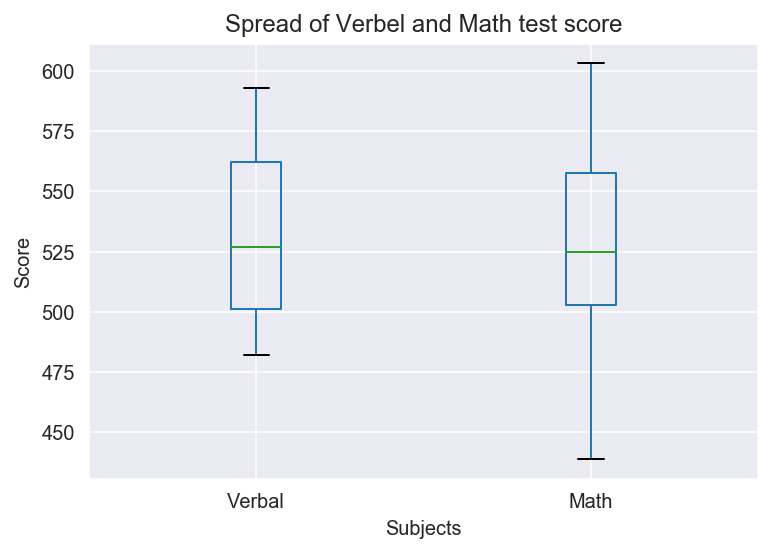

In [31]:
ax2 = sat_data.boxplot(column=['Verbal', 'Math'], )
plt.title('Spread of Verbel and Math test score')
plt.xlabel('Subjects')
plt.ylabel('Score');

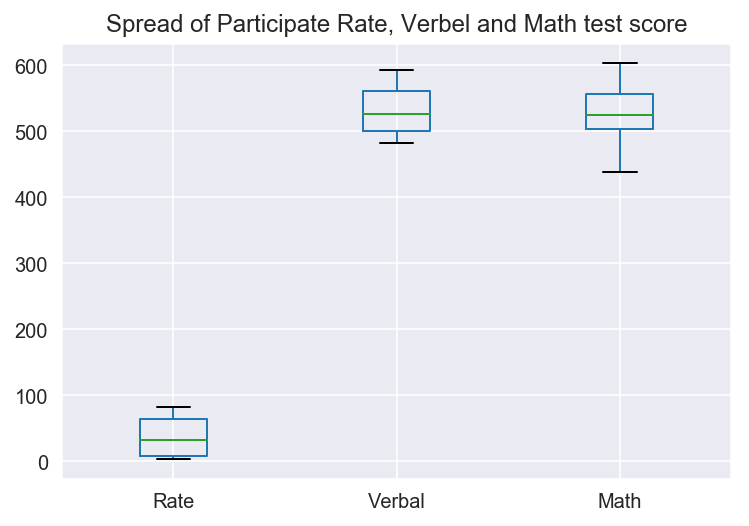

In [32]:
ax3 = sat_data.boxplot(column=['Rate', 'Verbal', 'Math'])
plt.title('Spread of Participate Rate, Verbel and Math test score');

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


## Answer
##### 1. plot rate in a different axis -> both axis has more reasonable scales
##### 2. change the color of the box same as the axis
##### 3. give the y label for each axis

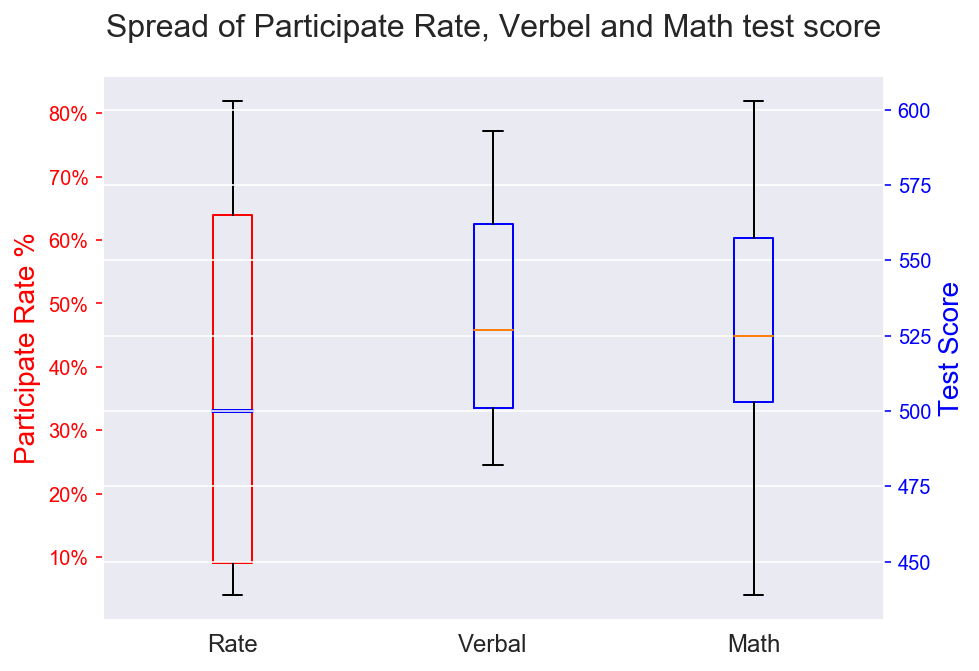

In [33]:
# set figure
fig, ax5 = plt.subplots(figsize=(7, 5))

# plot rate in ax5
box1 = ax5.boxplot(sat_data['Rate'], positions=[0], medianprops=dict(color='blue',linewidth=2) )
plt.ylabel('Participate Rate %', fontsize=14)
ax5.set_yticklabels([str(ele)+'%' for ele in list(range(0,81,10))])

# get paired ax ax4 plot verbal and math
ax4 = ax5.twinx()
plt.ylabel('Test Score', fontsize=14)

box2 = ax4.boxplot(sat_data[['Verbal', 'Math']].values, positions=[1,2],)

ax5.set_xlim(-0.5,2.5)
ax5.set_xticks(range(3))
ax5.set_xticklabels(sat_data.columns[1:4], fontsize=12)
ax5.grid(False)

plt.title('Spread of Participate Rate, Verbel and Math test score', fontsize=16, y=1.05)

# set color of boxes and ax
box1['boxes'][0].set_color('red')
box2['boxes'][0].set_color('blue')
box2['boxes'][1].set_color('blue')
ax5.yaxis.label.set_color('red')
ax5.tick_params(axis='y', colors='red')
ax4.yaxis.label.set_color('blue')
ax4.tick_params(axis='y', colors='blue')


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [34]:
# get the mean and filter with the mean
verbal_mean = np.mean(sat_data.Verbal)
verbal_sats = sat_data[sat_data.Verbal>verbal_mean]['State'].tolist()
print(f"The following states have verbel test score higher than the average verbel score {verbal_mean}: {verbal_sats}")
print(f"There are {len(verbal_sats)} out of {len(sat_data)} states has higher than average verbal score")

The following states have verbel test score higher than the average verbel score 532.5294117647059: ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
There are 24 out of 51 states has higher than average verbal score


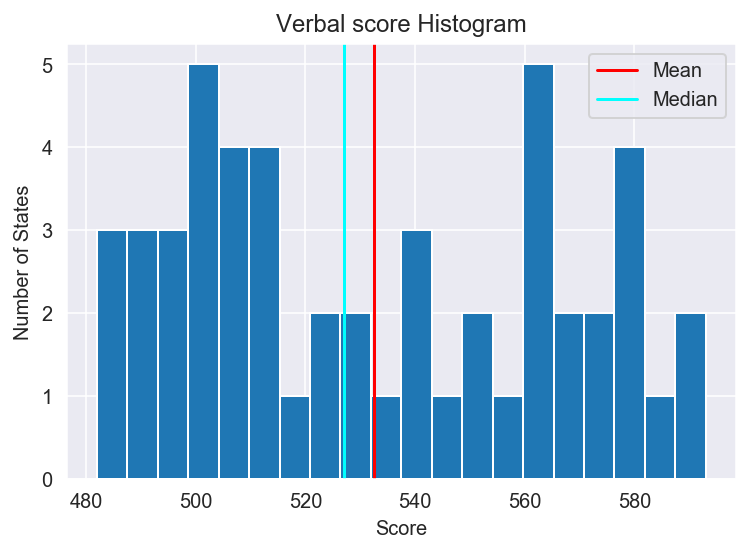

In [35]:
plt.hist(sat_data.Verbal, bins=20)
plt.title('Verbal score Histogram')
plt.xlabel('Score')
plt.ylabel('Number of States')
sat_data.Verbal.describe()
plt.axvline(x=verbal_mean, color='red', label='Mean')
plt.axvline(x=np.median(sat_data.Verbal), color='cyan', label='Median')
plt.legend();


## Answer:
The median of the Verbal is lower than the mean of Verbal score. Combined with the histogram, can find there are double pick in the score distribution, there are a greater number of states in the higher score group than a slightly smaller group of states which has low score.
The distribution is kind of 'positively skewed'

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [36]:
verbal_median = np.median(sat_data.Verbal)
verbal_sats_median = sat_data[sat_data.Verbal>verbal_median]['State'].tolist()
print(f"The following states have verbel test score higher than the median verbel score {verbal_median}: {verbal_sats_median}")
print(f"There are {len(verbal_sats_median)} out of {len(sat_data)} states has higher than median verbal score")

The following states have verbel test score higher than the median verbel score 527.0: ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
There are 24 out of 51 states has higher than median verbal score


In [37]:
# print for greater or equal
verbal_median = np.median(sat_data.Verbal)
verbal_sats_median = sat_data[sat_data.Verbal>=verbal_median]['State'].tolist()
print(f"The following states have verbel test score higher or equal to the median verbel score {verbal_median}: {verbal_sats_median}")
print(f"There are {len(verbal_sats_median)} out of {len(sat_data)} states has no less than median verbal score")

The following states have verbel test score higher or equal to the median verbel score 527.0: ['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
There are 26 out of 51 states has no less than median verbal score


## Answer:
The number of state has higher score then median is the same as the result compare to mean value, since there are two states has the verbal score exact as the median. If change tp greater or equal, there are two more states in the list.
As mentioned, the median score is lower than the mean score is because there are more states in the high score group.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [38]:
sat_data['Score_difference'] = sat_data.Verbal - sat_data.Math

In [39]:
sat_data.head()

,State,Rate,Verbal,Math,Sum_Score,Score_difference
0,CT,82,509,510,1019,-1
1,NJ,81,499,513,1012,-14
2,MA,79,511,515,1026,-4
3,NY,77,495,505,1000,-10
4,NH,72,520,516,1036,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [49]:
Verbal_good_states = sat_data[sat_data.Verbal > sat_data.Math].sort_values(by='Score_difference', ascending=False).head(10).copy()
Verbal_good_states.head(3)

,State,Rate,Verbal,Math,Sum_Score,Score_difference
27,OH,26,534,439,973,95
29,WV,18,527,512,1039,15
50,MS,4,566,551,1117,15


In [50]:
Math_good_states = sat_data[sat_data.Verbal < sat_data.Math].sort_values(by='Score_difference').head(10).copy()
Math_good_states.head(3)

,State,Rate,Verbal,Math,Sum_Score,Score_difference
21,HI,52,485,515,1000,-30
23,CA,51,498,517,1015,-19
1,NJ,81,499,513,1012,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [51]:
sat_data.corr()

,Rate,Verbal,Math,Sum_Score,Score_difference
Rate,1.000000,-0.888121,-0.773419,-0.849860,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.972453,0.044527
Math,-0.773419,0.899909,1.000000,0.976768,-0.395574
Sum_Score,-0.849860,0.972453,0.976768,1.000000,-0.189566
Score_difference,-0.098671,0.044527,-0.395574,-0.189566,1.000000


## Answer:
It tells the correlate between each columns. E.g. Rate and the score (Math, Verbabl, Total) has strong negative correlation, which may indicate, the more people participate, the average score decrease. Math and Verbal score has strong passitive correlation, which may indicate that people has higher score in Math also has higher score in Verbal in general.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [52]:
sat_data.describe()

,Rate,Verbal,Math,Sum_Score,Score_difference
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,1064.372549,0.686275
std,27.550681,33.360667,36.287393,67.886069,15.839811
min,4.000000,482.000000,439.000000,956.000000,-30.000000
25%,9.000000,501.000000,503.000000,1003.000000,-6.000000
50%,33.000000,527.000000,525.000000,1048.000000,0.000000
75%,64.000000,562.000000,557.500000,1121.500000,4.500000
max,82.000000,593.000000,603.000000,1196.000000,95.000000


## Answer:
count-> number of apperance; mean-> Average; std-> standard deviation; min-> minimal value, 25%-> 25% percentail, 50% -> 50% parcential(median); 75%-> 75% percentail; max-> maximum value

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [53]:
sat_data.cov()

,Rate,Verbal,Math,Sum_Score,Score_difference
Rate,759.04,-816.280000,-773.220000,-1589.500000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,2202.338824,23.529412
Math,-773.22,1089.404706,1316.774902,2406.179608,-227.370196
Sum_Score,-1589.50,2202.338824,2406.179608,4608.518431,-203.840784
Score_difference,-43.06,23.529412,-227.370196,-203.840784,250.899608


## Answer
### 1. The covariance shows the relation between different columns, but it is not normalized and very difficult to compare between each covariance. Covariance has its own usage, but correlation has a bound [-1, 1], which is easier to tell how strong the relation is
### 2. Normalize, cov/(sigma(x)*sigma(y))
### 3. Correlation is with bound [-1, 1], unitless, 0 means no correlation, -1 means strong negative correlation, 1 means strong positive correlation. Covariance has no bound, hard to tell.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

## Answer:
### Does the data require cleaning
#### 1. Yes, data need cleaning. 

#### 2. There are missing values in the frequency for some drugs. This indicates there is no user for this drug. Important note: There are also drugs has 0.0 -use, but nonzero frequency, this indicates for this drug there still very little users 
Repalce the - by np.nan value

#### 3. This will make the numerical column to be string, which cannot used for numerical calculation and ploting


In [ ]:
drug_csv = "drug-use-by-age.csv"
drug = pd.read_csv(drug_csv)
drug.head(10)

In [ ]:
drug.dtypes.values

In [ ]:
# check the unique value of the col with data type as object
for i, col in enumerate(drug.dtypes.index):
    if drug.dtypes.values[i] == object:
        print(f"The column {col} has dtype as {drug.dtypes.values[i]}")
        print(f"The unique value of {col} are {drug[col].unique()}]\n")

In [ ]:
drug.iloc[:,3:] = drug.iloc[:,3:].applymap(lambda x: np.nan if x=='-' else float(x))

In [ ]:
drug.dtypes

In [ ]:
# check the unique value of corrected data
for i, col in enumerate(drug.dtypes.index):
    print(f"The column {col} has dtype as {drug.dtypes.values[i]}")
    print(f"The unique value of {col} are {drug[col].unique()}]\n")

In [ ]:
# Numerical check for the percentage value

for i, col in enumerate(drug.dtypes.index):
    if '-use' in col:
        print(f"The column {col} has {sum(drug[col].unique()>100)} ele bigger than 100%")
        print(f"The column {col} has {sum(drug[col].unique()<0)} ele less than 0%")

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [ ]:
# get column name for usage and frequency of each drug
col_usage = [col for col in drug.columns if '-use' in col]
col_freq = [col for col in drug.columns if '-frequency' in col]

In [ ]:
col_usage,col_freq

In [ ]:
age_stamp = drug.age.values.copy()
for i, age in enumerate(age_stamp):
    try:
        age_stamp[i] = float(age)
    except:
        try:
            ages = age.split('-')
            age_stamp[i] = (int(ages[0]) + int(ages[1]))/2
        except:
            age_stamp[i] = float(age.replace('+', ''))

In [ ]:
drug.insert(loc=1, column='age_mean', value=age_stamp)

In [ ]:
age_group = []

for age in drug.age_mean:
    if age<15:
        age_group.append('Children')
    elif age<18:
        age_group.append('Minor')
    elif age<23:
        age_group.append('Young_adult')
    elif age<35:
        age_group.append('Adult')
    elif age<50:
        age_group.append('Young_middle_age')
    elif age<65:
        age_group.append('Middle_age')
    else:
        age_group.append('Senior')
drug.insert(loc =1, column='Age_group', value=age_group)

In [ ]:
col_list = ['age', 'age_mean','Age_group', 'n']
col_list.extend(col_usage)
drug_use = drug[col_list].copy()
drug_use.columns = [col.replace('-use','') for col in drug_use.columns]
col_use = drug_use.columns[4:]
drug_use.head()

In [ ]:
col_list = ['age','age_mean','Age_group', 'n']
col_list.extend(col_freq)
drug_freq = drug[col_list].copy()
drug_freq.columns = [col.replace('-frequency','') for col in drug_freq.columns]
col_freq = drug_freq.columns[4:]
drug_freq.head()

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20,14)
drug_use.plot(x='age_mean', y=col_use, ax=ax, style='-*', fontsize=15, xlim=(11, 66))
plt.legend(loc=1, prop={'size': 15})
ax.set_xlim(11, 66)
plt.title('Drug use percentage vs age', size=24)
ax.set_yticks(range(0,81,20))
ax.set_yticklabels(['0','20%','40%','60%','80%'], fontsize=16);
ax.set_xticks(list(drug_use.age_mean))
ax.set_xticklabels(drug_use.age, fontsize=16);

plt.legend(loc=1, prop={'size': 14})

plt.xlabel('Age', size=20)
plt.ylabel('Usage percentage', size=20);

In [ ]:
fig1, ax1 = plt.subplots(13,1)
fig1.set_size_inches(20,35)
fig1.text(0.4, 0.9,'Usage percentage vs age', va='center', fontsize=25)
fig1.text(0.08, 0.5, 'Usage Percentage %', va='center', rotation='vertical', fontsize=20)
plt.legend(prop={'size': 15})

for i in range(len(col_use)):
    drug_use.plot(x='age_mean', y=col_use[i], ax=ax1[i], fontsize=15, xlim=(11, 66),  style='-*')
    ax1[i].axhline(y=10, linestyle='--', color='red',label='widely used line')
    ax1[i].set_xticks(drug.age_mean)
    ax1[i].legend(prop={'size': 15});
    ax1[i].set_xticklabels(drug_use.age);
    plt.xlabel('Age', size=20);

In [ ]:
fig2, ax2 = plt.subplots(13,1)
fig2.set_size_inches(20,35)
fig2.text(0.4, 0.9,'Use Frequency (times/12 month) vs age', va='center', fontsize=25)
fig2.text(0.08, 0.5, 'Use Frequency (times/12 month))', va='center', rotation='vertical', fontsize=20)
plt.legend(prop={'size': 15})
for i in range(len(col_freq)):
    drug_freq.plot(x='age_mean', y=col_freq[i], ax=ax2[i], fontsize=15, xlim=(11, 66))
    ax2[i].axhline(y=52, linestyle='--', color='red',label='Once per week line')
    ax2[i].set_xticks(drug.age_mean)
    ax2[i].legend(prop={'size': 15});
    ax2[i].set_xticklabels(drug_freq.age);
    plt.xlabel('Age', size=20);


In [ ]:
fig3, ax3 = plt.subplots(1,1)
fig3.set_size_inches(15,10)
plt.title('Usage per Drug Boxplot', size=22)
medians = drug_use.loc[:,col_use].describe().loc['50%',:].sort_values(ascending=False)
sns.boxplot(data=drug_use[col_use], ax=ax3, notch=True, orient='h', order=medians.index)
ax3.set_xlim(0,100)
plt.ylabel('Drug', fontsize=14)
plt.xlabel('Usage Percentage', fontsize=14)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=14)


for i, tick in enumerate( range(len(ax3.get_yticklabels()))):
    ax3.text(y = tick+0.3, x=medians.values[i]+25, s = (' Median: \n' + str(medians.values[i]) +'%'), fontsize=14, horizontalalignment='center')

In [ ]:
fig4, ax4 = plt.subplots(1,1)
fig4.set_size_inches(15,10)
medians = drug_freq.loc[:,col_freq].describe().loc['50%',:].sort_values(ascending=False)
plt.title('Use Frequency (times/12 months) vs Drug', fontsize = 20)
sns.boxplot(data=drug_freq[col_freq], ax=ax4, order=medians.index, orient='h')
plt.ylabel('Drug', fontsize=14)
plt.xlabel('Use Frequency (times/12 months)', fontsize=14)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=14)

for i, tick in enumerate( range(len(ax4.get_yticklabels()))):
    ax4.text(y = tick+.2, x=medians.values[0]*4, s = (' Median: \n' + str(medians.values[i])), fontsize=14, horizontalalignment='center')

In [ ]:
corr_heat = sns.heatmap(drug_use.iloc[:,4:].corr(),annot=True, cmap='RdBu', vmin=-1, vmax=1 )
plt.gcf().set_size_inches(18,8)
plt.title('Drug Usge Correlation', fontsize=18);

In [ ]:
def agegroupinfo(x, col_use=col_use):
    info = []
    info.append(np.sum(x.n))
    info.append(np.mean(x.age_mean))
    usage_p = (x.n.dot(x[col_use])/np.sum(x.n)).values
    info.extend((x.n.dot(x[col_use])/np.sum(x.n)).values)
    index = ['NumPeople', 'age_mean']
    index.extend(col_use)
    return pd.Series(info, index=index)

In [ ]:
drug_use_age = drug_use.groupby('Age_group').apply(agegroupinfo).sort_values(by='age_mean')

In [ ]:
drug_use_age

In [ ]:
drug_type = {
    'alcohol': ['alcohol'],
    'illicit_soft':['marijuana','hallucinogen','inhalant','stimulant'],
    'prescription': ['pain-releiver','oxycontin','tranquilizer','sedative'],
    'illicit_hard':['cocaine','crack','heroin','meth']
    
    
    }
def findDrugtype(drug_input, drug_type=drug_type):
    for Drugtype, drug in drug_type.items():
        if drug_input in drug:
            return Drugtype

In [ ]:
drug_age_type = drug_use_age[["NumPeople","age_mean"]].copy()

In [ ]:
for col in drug_type.keys():
    drug_age_type[col]=drug_use_age[drug_type[col]].apply(sum, axis=1)
    

In [ ]:
drug_age_type

In [ ]:
ax6 = drug_age_type[list(drug_type.keys())].plot(kind='bar', figsize=(12,8))
plt.title("Usage percentage vs Age Group", fontsize=20)
ax6.set_xticklabels(list(drug_age_type.index), fontsize=14, rotation=20 )
ax6.set_yticks(list(range(0,100,20)))
ax6.set_yticklabels([str(ele)+'%' for ele in list(range(0,100,20))], fontsize=14 );
ax6.set_xlabel('Age_group',fontsize=14)
ax6.set_ylabel('Usage Percentage',fontsize=14)
plt.legend(loc=2, prop={'size': 16})


In [ ]:
drug_freq

In [ ]:
def freq_age_agg(x):
    info = []
    info.append(x.age_mean.mean())
    info.append(x.n.sum())
    info = pd.Series(info, index=['age_mean', 'NumPeople'])
    info = info.append(x.iloc[:,4:].apply(lambda x: x.median(skipna=True),axis=0))
    return info

In [ ]:
drug_freq_age = drug_freq.groupby('Age_group').apply(freq_age_agg).sort_values(by='age_mean')

In [ ]:
drug_freq_age_type = drug_freq_age[["NumPeople","age_mean"]].copy()
for col in drug_type.keys():
    drug_freq_age_type[col]=drug_freq_age[drug_type[col]].apply(lambda x: x.median(skipna=True), axis=1)

In [ ]:
drug_freq_age_type

In [ ]:
ax7 = drug_freq_age_type[list(drug_type.keys())].plot(kind='bar', figsize=(12,8))
plt.title("Usage Frequency (times/12 month) vs Age Group", fontsize=20)
ax7.set_xticklabels(list(drug_freq_age_type.index), fontsize=14, rotation=20 )
ax7.set_xlabel('Age_group',fontsize=14)
ax7.set_ylabel('Usage Frequency',fontsize=14)
plt.legend(loc=2, prop={'size': 16})


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
#h1: soft illege drug has a different age disturbution compare to alcohol usage
# deliverable: 1. get usage percentage per age group for alcohol and soft illege drugs. 2. visual distribution over age 3. chi square test.
drug_age_type.plot(x='age_mean', y=list(drug_type.keys()), style='-*', fontsize=15, xlim=(11, 66))


In [ ]:
alcohol_distribution = list(drug_freq_age_type.alcohol.values)
illicit_soft_distribution = list(drug_freq_age_type.illicit_soft.values)
test_table = np.array([alcohol_distribution, illicit_soft_distribution])
results = stats.chi2_contingency(test_table)
results[0],results[1]

In [ ]:
def distribution_chi2(dist_1, dist_2):
    test_table = np.array([dist_1, dist_2])
    results = stats.chi2_contingency(test_table)
    print(f'The p values is {results[1]}')


In [ ]:
distribution_chi2(list(drug_use_age.alcohol.values), list(drug_use_age.marijuana.values))

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.